In [1]:
import os
import sys
import yaml
from glob import glob
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as astropy_cosmo
import pandas as pd
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.lenses.strong_lens import StrongLens
from mejiro.utils import util

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

In [2]:
Double_SLACS = ['SDSSJ0029-0055', 'SDSSJ0037-0942', 'SDSSJ0819+4534', 'SDSSJ0903+4116', 'SDSSJ0936+0913',
                'SDSSJ0959+0410', 'SDSSJ1134+6027', 'SDSSJ1204+0358', 'SDSSJ1213+6708', 'SDSSJ1218+0830',
                'SDSSJ1531-0105', 'SDSSJ1621+3931', 'SDSSJ1627-0053', 'SDSSJ2302-0840']

Single_SLACS = ['SDSSJ0008-0004', 'SDSSJ0252+0039', 'SDSSJ0330-0020', 'SDSSJ0728+3835', 'SDSSJ0737+3216',
                'SDSSJ0912+0029', 'SDSSJ1023+4230', 'SDSSJ1100+5329', 'SDSSJ1112+0826', 'SDSSJ1250+0523',
                'SDSSJ1306+0600', 'SDSSJ1313+4615', 'SDSSJ1402+6321', 'SDSSJ1630+4520', 'SDSSJ1636+4707',
                'SDSSJ2238-0754', 'SDSSJ2300+0022', 'SDSSJ2303+1422', 'SDSSJ2343-0030', 'SDSSJ2347-0005']

Double_SL2S = ['SL2SJ0208-0714', 'SL2SJ0219-0829', 'SL2SJ1427+5516']
Single_SL2S = ['SL2SJ0214-0405', 'SL2SJ0217-0513', 'SL2SJ0225-0454', 'SL2SJ0226-0406', 'SL2SJ0226-0420',
               'SL2SJ0232-0408', 'SL2SJ0849-0251', 'SL2SJ0849-0412', 'SL2SJ0858-0143', 'SL2SJ0901-0259',
               'SL2SJ0904-0059', 'SL2SJ0959+0206', 'SL2SJ1358+5459', 'SL2SJ1359+5535', 'SL2SJ1401+5544',
               'SL2SJ1402+5505', 'SL2SJ1405+5243', 'SL2SJ1406+5226', 'SL2SJ1411+5651', 'SL2SJ1420+5630',
               'SL2SJ2214-1807']

Double_BELLS = ['SDSSJ0801+4727', 'SDSSJ0944-0147', 'SDSSJ1234-0241', 'SDSSJ1349+3612', 'SDSSJ1542+1629',
                'SDSSJ1631+1854', 'SDSSJ2125+0411']
Single_BELLS = ['SDSSJ0151+0049', 'SDSSJ0747+5055', 'SDSSJ0830+5116', 'SDSSJ1159-0007', 'SDSSJ1215+0047',
                'SDSSJ1221+3806', 'SDSSJ1318-0104', 'SDSSJ1337+3620', 'SDSSJ1352+3216', 'SDSSJ1545+2748',
                'SDSSJ1601+2138', 'SDSSJ2303+0037']

slacs = Double_SLACS + Single_SLACS
sl2s = Double_SL2S + Single_SL2S
bells = Double_BELLS + Single_BELLS

In [29]:
system_name = 'SDSSJ0151+0049'
# system_name = 'SL2SJ1359+5535'
# system_name = 'SDSSJ0008-0004'

In [30]:
dinos_df = pd.read_csv(os.path.join(hwo_dir, 'data', 'dinos_i_tan_et_al_2024', 'dinos_i.csv'))

# get system information from CSV
row = dinos_df[dinos_df['Lens system'] == system_name].iloc[0]

z_lens = float(row['z_lens'])
z_source = float(row['z_source'])
print(f'z_lens: {z_lens}, z_source: {z_source}')

z_lens: 0.52, z_source: 1.36


In [31]:
from dolphin.analysis.output import Output

output = Output('/nfsdata1/bwedig/dinos_i_outputs')
_ = output.load_output(system_name, model_id='dinos_i')

-0.9834450649644587 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.983445064964457


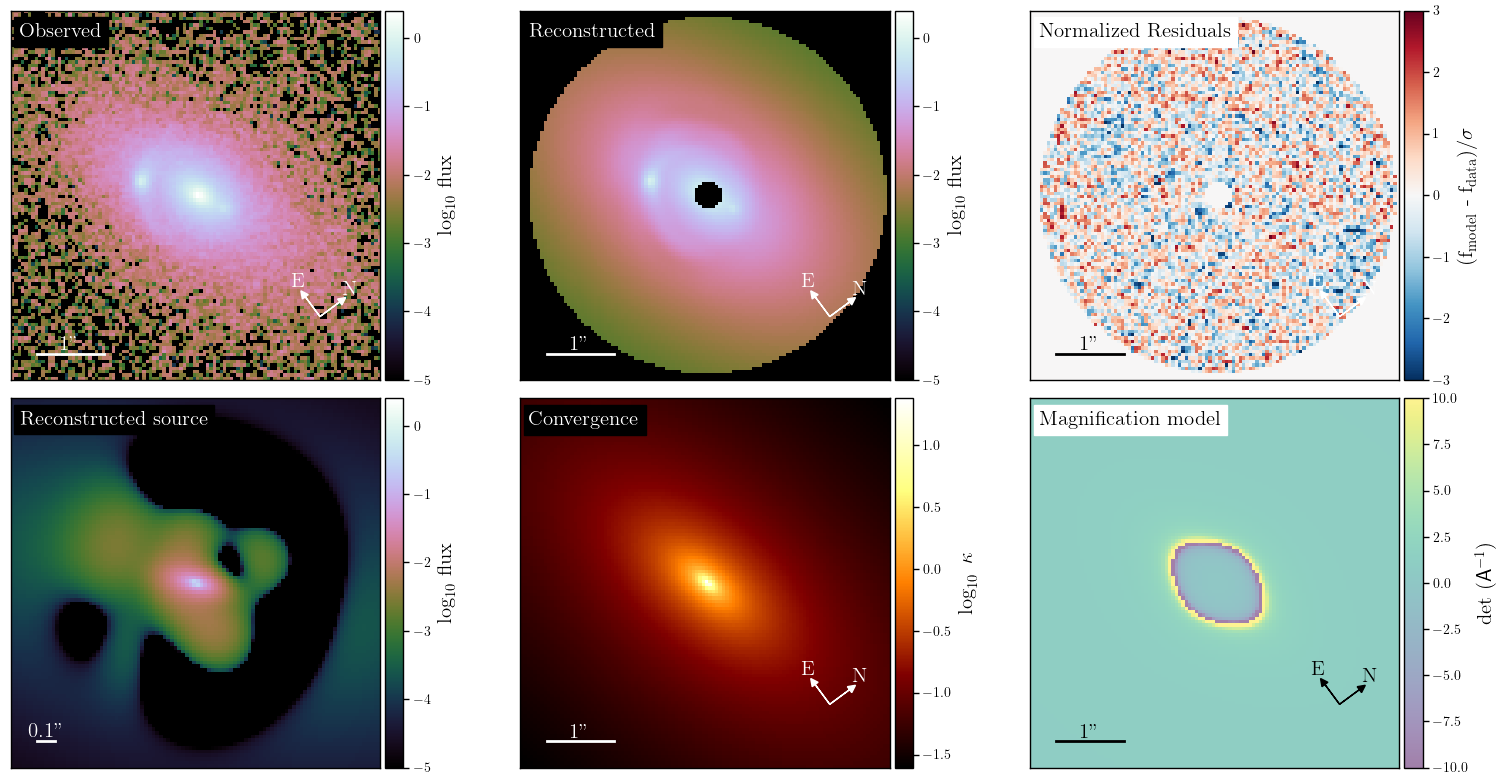

In [32]:
_ = output.plot_model_overview(lens_name=system_name, model_id='dinos_i')

In [33]:
pprint(output.kwargs_result)

{'kwargs_extinction': [],
 'kwargs_lens': [{'center_x': 0.005170298137809956,
                  'center_y': -0.0045663236699281925,
                  'e1': 0.2774382217035418,
                  'e2': -0.13792957825016763,
                  'gamma': 2.2737428766837118,
                  'theta_E': 0.6490958387296407},
                 {'dec_0': 0,
                  'gamma_ext': 0.07408808854868947,
                  'psi_ext': -0.06999393992667888,
                  'ra_0': 0}],
 'kwargs_lens_light': [{'R_sersic': 0.7579488206383813,
                        'amp': 22.1588814834379,
                        'center_x': 0.005170298137809956,
                        'center_y': -0.0045663236699281925,
                        'e1': 0.2066917700944455,
                        'e2': -0.15605395643199715,
                        'n_sersic': 4.0},
                       {'R_sersic': 0.7411534638279748,
                        'amp': 1.101471651484526,
                        'center_x': 0.005170

In [34]:
pprint(output.model_settings)

{'band': ['F814W'],
 'fitting': {'mcmc_settings': {'burnin_step': 0,
                               'init_samples': [[0.6504050881827254,
                                                 2.228370721933364,
                                                 0.13991871359106114,
                                                 -0.10407382446419779,
                                                 0.002890564594757094,
                                                 0.07673977583626068,
                                                 0.1967478346483108,
                                                 0.24668576905938816,
                                                 -0.15162026303793888,
                                                 0.30145199712815574,
                                                 7.924412798934084,
                                                 0.18440560534131561,
                                                 -0.34200504006815596,
                       

In [35]:
z_lens = float(row['z_lens'])
z_source = float(row['z_source'])

kwargs_lens = output.kwargs_result['kwargs_lens']
kwargs_lens_light = output.kwargs_result['kwargs_lens_light']
kwargs_source = output.kwargs_result['kwargs_source']

kwargs_params = {
    'kwargs_lens': kwargs_lens,
    'kwargs_lens_light': kwargs_lens_light,
    'kwargs_source': kwargs_source
}

kwargs_model = {
    'cosmo': astropy_cosmo.default_cosmology.get(),
    'lens_light_model_list': output.model_settings['model']['lens_light'],
    'lens_model_list': output.model_settings['model']['lens'],
    'lens_redshift_list': [z_lens] * len(kwargs_lens),
    'source_light_model_list': output.model_settings['model']['source_light'],
    'source_redshift_list': [z_source] * len(kwargs_source),
    'z_source': z_source,
    'z_source_convention': 5.
}
assert len(kwargs_model['lens_model_list']) == len(kwargs_model['lens_redshift_list'])
assert len(kwargs_model['source_light_model_list']) == len(kwargs_model['source_redshift_list'])

strong_lens = StrongLens(kwargs_model=kwargs_model,
                         kwargs_params=kwargs_params,
                         band='J',
                         uid=system_name)

In [42]:
from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.exposure import Exposure

hwo_eac1 = HWO(eac='EAC1')

kwargs_numerics = {
        'supersampling_factor': 3,
        'compute_mode': 'regular'
    }
synthetic_image_eac1 = SyntheticImage(strong_lens=strong_lens,
                                     instrument=hwo_eac1,
                                     band='J',
                                     arcsec=5,
                                     oversample=1,
                                     kwargs_numerics=kwargs_numerics,
                                     verbose=True)

engine_params = {
    'rng_seed': 42,
    'sky_background': True,
    'detector_effects': True,
    'poisson_noise': True,
    'dark_noise': True,
    'read_noise': True,
}

exposure_eac1 = Exposure(synthetic_image_eac1,
                        exposure_time=7200,
                        engine_params=engine_params,
                        verbose=True)

Computing on pixel grid of size 229x229 (5.04229788616365"x5.04229788616365") with pixel scale 0.02201876806185 arcsec/pixel (natively 0.02201876806185 arcsec/pixel oversampled by factor 1)
Computing with 'regular' mode and supersampling factor 3


Initialized SyntheticImage for StrongLens SDSSJ0151+0049 by HWO in J band
Exposure calculation time with galsim engine: 0:00:00


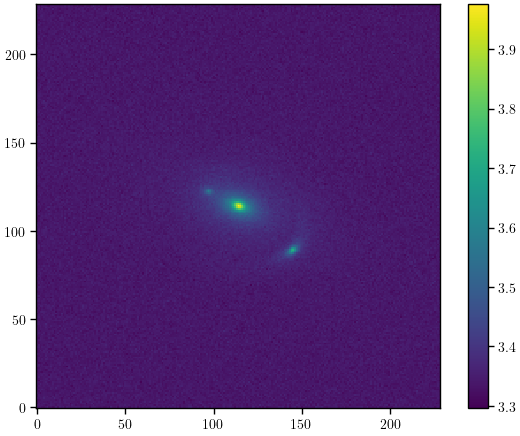

In [43]:
plt.imshow(np.log10(exposure_eac1.exposure))
plt.colorbar()
plt.show()